In [10]:
import matplotlib.pyplot as plt
import pandas as pd
!pwd
%matplotlib inline

/home/tim/src/gkigit.informatik.uni-freiburg.de/tschulte/dimap


In [13]:
files = [
    'benchmarks/results/feb-05-2018-084907-results.csv',
    'benchmarks/results/feb-09-2018-082423-results.csv',
    'benchmarks/results/feb-09-2018-154759-results.csv',
    'benchmarks/results/feb-12-2018-094100-results.csv',
    'benchmarks/results/mar-21-2018-083349-results.csv',
    'benchmarks/results/mar-26-2018-123427-results.csv',
    'benchmarks/results/apr-06-2018-121125-results.csv'
]

def iter_frames(files):
    for f in files:
        df = pd.read_csv(f)
        yield df.set_index(['Config', 'Domain', 'Problem', 'AgentID'])


def groupings(frames):
    for f in frames:
        g = f.groupby(level=['Config', 'Domain', 'Problem'])[['Solved', 'Time', 'Expansions']]
        g = g.agg({'Solved':'max', 'Time':'mean', 'Expansions':'sum'})
        yield g

dfs = list(iter_frames(files))
gs = list(groupings(dfs))

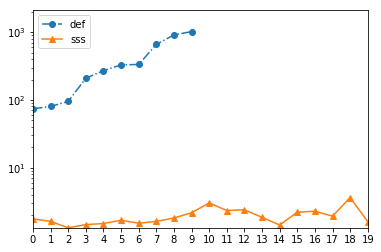

In [14]:
g = gs[-1].query('Domain == "productionsite"')
g = g.unstack('Config')
g = g['Time'][['gc-mafs-defrt', 'gc-mafs-defrt-sss']]
g = g * 60.0

g = g.sort_values(by='gc-mafs-defrt')
g = g.iloc[28:48]
g = g[g <= (30.0 * 60.0)].reset_index(drop=True)
g.columns = ['def', 'sss']

g.plot(style=['o-.', '^-', 'x-'], ylim=[-2,(35*60)], xticks=range(20), logy=True)
plt.legend(loc=2)
plt.savefig('productionsite.pdf', dpi=300, bbox_inches='tight', pad_inches=0.0)

In [15]:
# Coverage per config (summary)
coverage = list()
for i, g in enumerate(gs):
    coverage.append(g['Solved'].groupby(level=['Config', 'Domain']).sum().unstack('Config'))
    print('-'.join(files[i].split('-')[:-2]))
    print(coverage[i], end='\n\n')

benchmarks/results/feb-05-2018
Config       dmtg-def  dmtg-deft  dmtg-t100  dmtg-t100t  mafs-def  mafs-deft  \
Domain                                                                         
blocksworld       0.0        1.0       16.0        16.0       0.0        0.0   
depot             2.0        2.0        1.0         2.0       0.0        0.0   
driverlog        15.0       15.0       20.0        20.0      15.0       17.0   
elevators        12.0       14.0       17.0        15.0      15.0       13.0   
logistics        15.0       16.0       20.0        17.0      12.0       14.0   
rovers            9.0       10.0       20.0        20.0      18.0       18.0   
satellites        9.0       10.0       20.0        20.0      17.0       20.0   
sokoban           9.0        9.0        8.0        10.0       7.0        8.0   
taxi             14.0       15.0       12.0        12.0       2.0        2.0   
wireless          2.0        2.0        2.0         2.0       1.0        1.0   
woodworki

In [6]:
coverage[-1].T

Domain,productionsite
Config,
blind-mafs-defrt,2.0
blind-mafs-defrt-sss,49.0
gc-mafs-defrt,39.0
gc-mafs-defrt-sss,49.0
mafs-defrt,36.0
mafs-defrt-sss,48.0


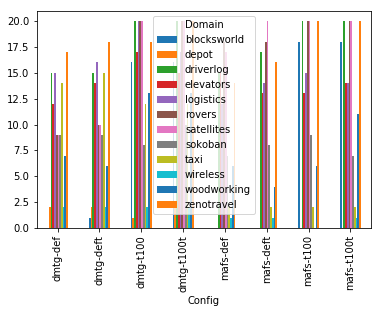

In [66]:
%matplotlib inline
coverage[0].plot.bar()


In [6]:
coverage

[Config       dmtg-def  dmtg-deft  dmtg-t100  dmtg-t100t  mafs-def  mafs-deft  \
 Domain                                                                         
 blocksworld       0.0        1.0       16.0        16.0       0.0        0.0   
 depot             2.0        2.0        1.0         2.0       0.0        0.0   
 driverlog        15.0       15.0       20.0        20.0      15.0       17.0   
 elevators        12.0       14.0       17.0        15.0      15.0       13.0   
 logistics        15.0       16.0       20.0        17.0      12.0       14.0   
 rovers            9.0       10.0       20.0        20.0      18.0       18.0   
 satellites        9.0       10.0       20.0        20.0      17.0       20.0   
 sokoban           9.0        9.0        8.0        10.0       7.0        8.0   
 taxi             14.0       15.0       12.0        12.0       2.0        2.0   
 wireless          2.0        2.0        2.0         2.0       1.0        1.0   
 woodworking       7.0      